In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def show_image(image, name='Lenna'):
    plt.imshow(image)
    plt.title(name)
    plt.savefig(name)
    plt.show()

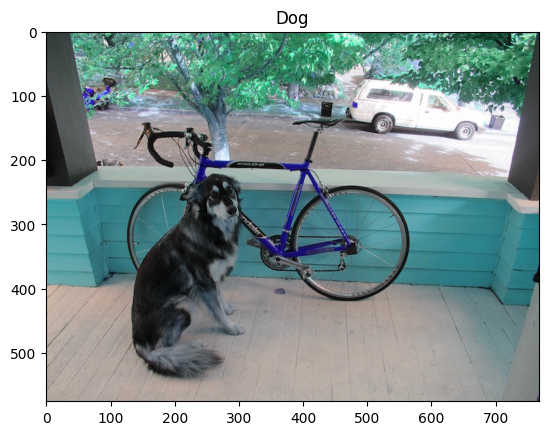

(576, 768, 3)


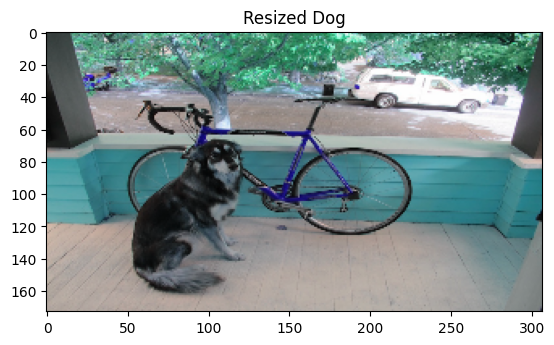

(173, 307, 3)


In [16]:
image = cv2.imread('../images/dog.jpg')
resized_image = cv2.resize(image, None, fx=0.4, fy=0.3)

show_image(image, 'Dog')
print(image.shape)
show_image(resized_image, 'Resized Dog')
print(resized_image.shape)

In [17]:
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
classes  = []
with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

In [18]:
for i in net.getUnconnectedOutLayers():
    print(i)

200
227
254


In [19]:
layer_names = net.getLayerNames()
outputlayers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

In [20]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [21]:
height, width, channels = resized_image.shape
blob = cv2.dnn.blobFromImage(resized_image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

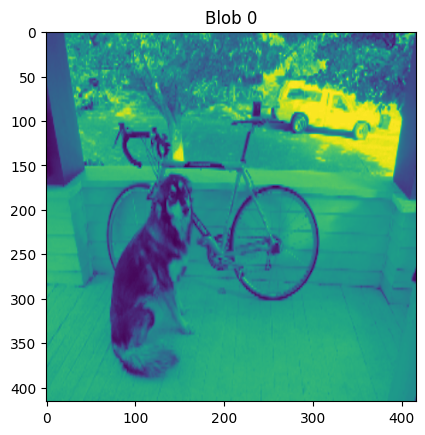

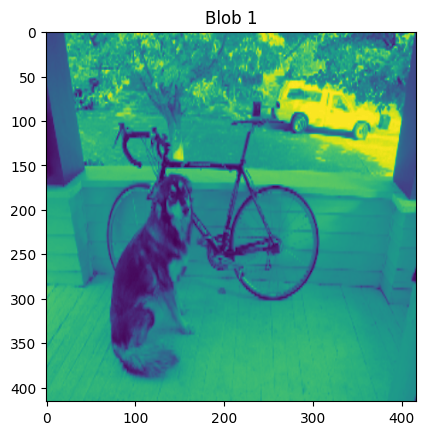

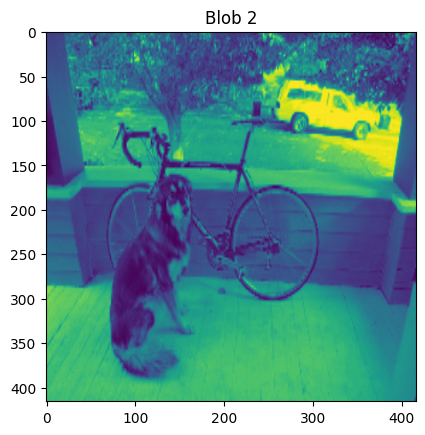

In [22]:
for b in blob:
    for i, image_blob in enumerate(b):
        show_image(image_blob, f'Blob {i}')

In [23]:
net.setInput(blob)
outs = net.forward(outputlayers)
print(outs[1])

[[0.02118014 0.0238813  0.04664543 ... 0.         0.         0.        ]
 [0.01726333 0.01875134 0.38844588 ... 0.         0.         0.        ]
 [0.02118462 0.01801867 0.07650216 ... 0.         0.         0.        ]
 ...
 [0.9731635  0.9751838  0.05149286 ... 0.         0.         0.        ]
 [0.9797624  0.9754399  0.30574438 ... 0.         0.         0.        ]
 [0.97900224 0.9831845  0.08113795 ... 0.         0.         0.        ]]


In [24]:
class_ids=[]
confidences=[]
boxes=[]
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # object detected
            center_x= int(detection[0] * width)
            center_y= int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # rectangle co-ordinaters
            x=int(center_x - w/2)
            y=int(center_y - h/2)

            boxes.append([x, y, w, h])  # put all rectangle areas
            confidences.append(float(confidence)) 
            # how confidence was that object detected and show that percentage
            class_ids.append(class_id)  # name of the object tha was detected

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.4, 0.6)

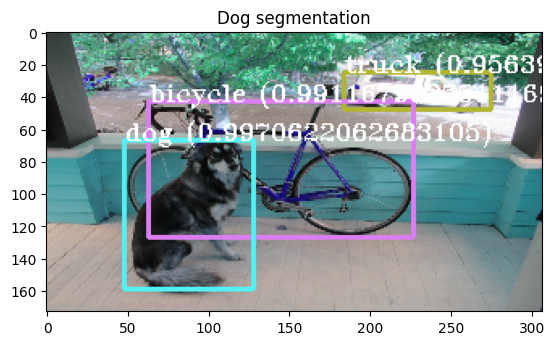

In [25]:
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = classes[class_ids[i]]
        color = colors[i]
        cv2.rectangle(resized_image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(
            resized_image,
            label + ' (' + str(confidences[i]) + ')',
            (x, y),
            fontFace=cv2.FONT_HERSHEY_TRIPLEX,
            fontScale=0.5,
            color=(255, 255, 255)
        )

show_image(resized_image, 'Dog segmentation')